# Simulation 1

Vivek Gopalakrishnan | June 26, 2019


## Purpose

To determine if an edge is significantly different across 2 populations, should 
you use a T-test, the Mann Whitney U Test, or Fisher's Exact Test?


## Setup

- In this experiment, we use the indpendent edge (IE) model. 
- According to this model, the weight of each edge is given by an independent
Bernoulli randomn variable, i.e. $\Pr{(A_{ij} = 1)} = p_{ij}$. 
- The matrix of all $p_{ij}$'s is called the P matrix.
- We generate two samples from different IE models. Each model has a
symmetric P matrix with the same shape (therefore, each simulated graph
has the same number of nodes).


## Simulation

### Procedure

1. Let 
$\mathbf{b}$ be a vector of length $n$ linearly 
increasing over the range $[\epsilon, 1-\epsilon]$.

2. Let 
$\mathbf{P_1}$ be a grid determined by $\mathbf{b}$, i.e. 
$\mathbf{P_1}(1,1) = \mathbf{b}_1, \mathbf{P_1}(1,2) = \mathbf{b}_2, ...$ .

3. Let 
$
\mathbf{P_2}(u,v) = \begin{cases} 
    \mathbf{P_1}(u,v) + \delta \hspace{6mm} \text{if} \hspace{2mm} \mathbf{P_1}(u,v) < 0.5 \\
    \mathbf{P_1}(u,v) - \delta \hspace{6mm} \text{if} \hspace{2mm} \mathbf{P_1}(u,v) \geq 0.5
\end{cases}
$

4. Sample
$X_i \stackrel{iid}{\sim} \text{IE}(\mathbf{P_1})$ and 
$Y_i \stackrel{iid}{\sim} \text{IE}(\mathbf{P_2})$
for $i=1,...,m$.

Notice that $\mathbf{P_1} \in \mathbb{R}^{n \times n}$ 
and $\mathbf{P_2} \in \mathbb{R}^{n \times n}$.


## Testing

For each edge $ij$, 
1. Use the T-test to test the null hypothesis $\text{mean}(X_{ij}) = \text{mean}(Y_{ij})$
2. Use Kruskal-Wallis to test the null hypothesis $\text{median}(X_{ij}) = \text{median}(Y_{ij})$
3. Use Fisher's Exact Test to get the exact probability of observing any combination of edges

Plot the power versus $\mathbf{P}_{ij}$.

### Notes about Kruskal-Wallis
- Kruskal-Wallis is the multisample generalization of the 2-sample Mann-Whitney
U test.
- Kruskal-Wallis doesn't assume that the samples are paired like Wilcoxon does.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from graspy.utils import is_symmetric
from scipy.stats import ttest_ind, mannwhitneyu, fisher_exact

from src.simulations import IndependentEdge

%matplotlib inline

## Visualize the parameters and sample data

Plot the matrices $\mathbf{P_1}$ and $\mathbf{P_2}$ 
and plot the elements of $\mathbf{P_1}$ vs the elements of $\mathbf{P_2}$.

Plot the average connectome for each population 
$\bar{\mathbf{X}}$ and $\bar{\mathbf{Y}}$.
Also plot $\bar{\mathbf{Y}} - \bar{\mathbf{X}}$

In [2]:
ie = IndependentEdge(sample_size=100, n_vertices=10, epsilon=0.001, delta=0.05)

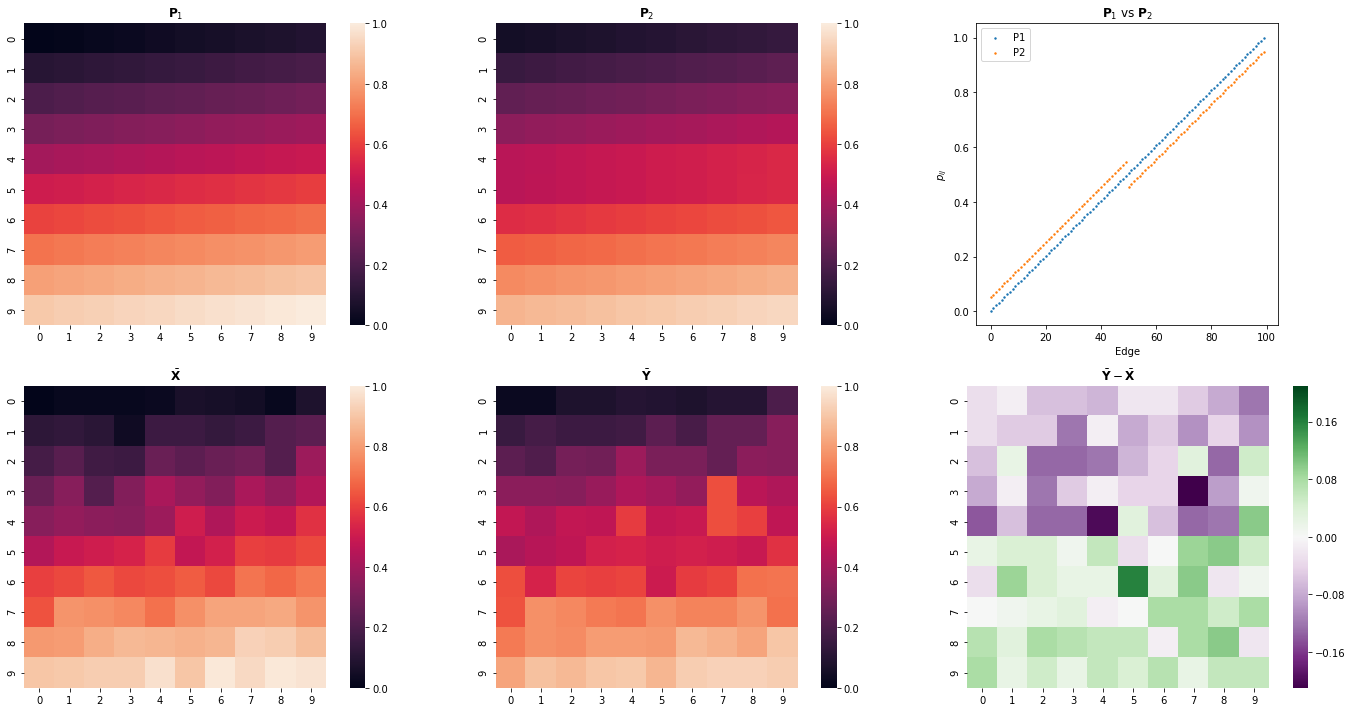

In [3]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10),)

# Draw the heatmaps
sns.heatmap(ie.p1, square=True, ax=ax[0, 0], vmin=0, vmax=1)
sns.heatmap(ie.p2, square=True, ax=ax[0, 1], vmin=0, vmax=1)
ax[0, 0].set(title=r"$\mathbf{P}_1$")
ax[0, 1].set(title=r"$\mathbf{P}_2$")

# Draw the scatterplot
y1 = ie.p1.flatten()
y2 = ie.p2.flatten()
x = range(len(y1))
ax[0, 2].scatter(x, y1, label="P1", s=2)
ax[0, 2].scatter(x, y2, label="P2", s=2)
ax[0, 2].legend()
ax[0, 2].set(title=r"$\mathbf{P}_1$ vs $\mathbf{P}_2$",
             xlabel="Edge", ylabel=r"$p_{ij}$")
x0, x1 = ax[0, 2].get_xlim()
y0, y1 = ax[0, 2].get_ylim()
ax[0, 2].set_aspect((x1-x0)/(y1-y0))

# Draw the average connectomes
x, y = ie._sample()
x_bar = np.mean(x, axis=0)
y_bar = np.mean(y, axis=0)

# X_bar
sns.heatmap(x_bar, square=True, ax=ax[1, 0], vmin=0, vmax=1)
ax[1, 0].set(title=r"$\bar{\mathbf{X}}$")

# Y_bar
sns.heatmap(y_bar, square=True, ax=ax[1, 1], vmin=0, vmax=1)
ax[1, 1].set(title=r"$\bar{\mathbf{Y}}$")

# Y_bar - X_bar
data = x_bar - y_bar
vmax = np.max(data)
vmin = np.min(data)
vmax = max(vmax, -vmin)
sns.heatmap(data, square=True, ax=ax[1, 2], cmap="PRGn", vmax=vmax, vmin=-vmax)
ax[1, 2].set(title=r"$\bar{\mathbf{Y}} - \bar{\mathbf{X}}$")

plt.tight_layout()

plt.savefig("power_parameters.png", dpi=300)
plt.show()

## Simulation 1

### Parameters
- Sample size: $m = 10$
- Number of vertices: $n = 10$
- $\epsilon = 0.001$
- $\delta = 0.05$

In [4]:
# Initialize generative class
ie = IndependentEdge(sample_size=10, n_vertices=10, epsilon=0.001, delta=0.05)

In [5]:
# Execute the simulation
pvals = ie.calculate_pvals(scipy_methods=[ttest_ind, mannwhitneyu, fisher_exact],
                           r_methods=["boschloo", "barnard"],
                           n_iter=100)

power = ie.calcualte_proportion_positive(pvals)

  0%|          | 0/100 [00:00<?, ?it/s]


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           0
           10

Outcome II
           2
            8



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.49071
Nuisance parameter = 0.579 (One sided), 0.5 (Two sided)
P-value = 0.119687 (One sided), 0.203705 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           0
           10

Outcome II
           1
            9



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.02598
Nuisance parameter = 0.614 (One sided), 0.5 (Two sided)
P-value = 0.326655 (One sided), 0.5 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           0
           10

Outcome II
           1
            9



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.02598
Nuisance parameter = 0.614 (One sided), 0.5 (Two sided)
P-value = 0.32


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           2
            8

Outcome II
           4
            6



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0.9759
Nuisance parameter = 0.145 (One sided), 0.843 (Two sided)
P-value = 0.247524 (One sided), 0.444187 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           3
            7

Outcome II
           5
            5



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0.912871
Nuisance parameter = 0.875 (One sided), 0.83 (Two sided)
P-value = 0.243046 (One sided), 0.431608 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           1
            9

Outcome II
           5
            5



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.9518
Nuisance parameter = 0.842 (One sided), 0.5 (Two sided)
P-value

  1%|          | 1/100 [00:09<15:57,  9.68s/it]


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           7
            3

Outcome II
           6
            4



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = -0.468807
Nuisance parameter = 0.119 (One sided), 0.895 (Two sided)
P-value = 0.408941 (One sided), 0.734229 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           6
            4

Outcome II
           7
            3



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0.468807
Nuisance parameter = 0.134 (One sided), 0.129 (Two sided)
P-value = 0.37602 (One sided), 0.784344 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           8
            2

Outcome II
           8
            2



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0
Nuisance parameter = 0 (One sided), 0.5 (Two sided)
P-value = 0 (


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           0
           10

Outcome II
           2
            8



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.49071
Nuisance parameter = 0.579 (One sided), 0.5 (Two sided)
P-value = 0.119687 (One sided), 0.203705 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           1
            9

Outcome II
           1
            9



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0
Nuisance parameter = 0 (One sided), 0.5 (Two sided)
P-value = 0 (One sided), 0.999998 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           0
           10

Outcome II
           1
            9



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.02598
Nuisance parameter = 0.614 (One sided), 0.5 (Two sided)
P-value = 0.326655 (One si


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           4
            6

Outcome II
           4
            6



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0
Nuisance parameter = 0 (One sided), 0.5 (Two sided)
P-value = 0 (One sided), 0.999998 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           7
            3

Outcome II
           4
            6



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = -1.3484
Nuisance parameter = 0.818 (One sided), 0.785 (Two sided)
P-value = 0.118006 (One sided), 0.187804 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           4
            6

Outcome II
           8
            2



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 1.82574
Nuisance parameter = 0.5 (One sided), 0.718 (Two sided)
P-value = 0.0420637 (One

  2%|▏         | 2/100 [00:18<15:36,  9.56s/it]


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           8
            2

Outcome II
           7
            3



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = -0.516398
Nuisance parameter = 0.091 (One sided), 0.106 (Two sided)
P-value = 0.474935 (One sided), 0.734454 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           9
            1

Outcome II
           9
            1



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0
Nuisance parameter = 0 (One sided), 0.5 (Two sided)
P-value = 0 (One sided), 0.999998 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
          10
            0

Outcome II
           9
            1



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = -1.02598
Nuisance parameter = 0.614 (One sided), 0.5 (Two sided)
P-value = 0.326655 (O


Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           3
            7

Outcome II
           3
            7



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0
Nuisance parameter = 0 (One sided), 0.5 (Two sided)
P-value = 0 (One sided), 0.999998 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           2
            8

Outcome II
           4
            6



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 0.9759
Nuisance parameter = 0.145 (One sided), 0.843 (Two sided)
P-value = 0.247524 (One sided), 0.444187 (Two sided)




Barnard's Unconditional Test



          
 Treatment I
 Treatment II

Outcome I 
           0
           10

Outcome II
           4
            6



Null hypothesis: Treatments have no effect on the outcomes
Score statistic = 2.23607
Nuisance parameter = 0.575 (One sided), 0.5 (Two sided)
P-value = 0.0165477 (One 

KeyboardInterrupt: 

In [ ]:
# Store the data in a Seaborn-compatible format
df = pd.DataFrame({
    r"$p_{ij}$": ie.p1.flatten(),
    "t-test": power[0].flatten(),
    "mann-whitney": power[1].flatten(),
    "fisher": power[2].flatten(),
    "boschloo": power[3].flatten(),
}).melt(
    id_vars=[r"$p_{ij}$"], 
    value_vars=["t-test", "mann-whitney", "fisher", "boschloo",],
    var_name="test", 
    value_name="power",
)

df.head()

In [ ]:
# Plot the power as a function of the connection strength
sns.set()
ax = sns.relplot(
    x=r"$p_{ij}$",
    y="power",
    hue="test",
    data=df,
    legend="full",
    kind="line",
)
plt.show()

## Simulation 2

### Parameters
- Sample size: $m = 100$
- Number of vertices: $n = 10$
- $\epsilon = 0.001$
- $\delta = 0.05$

In [ ]:
# Initialize generative class
ie = IndependentEdge(sample_size=100, n_vertices=10, epsilon=0.001, delta=0.05)

In [ ]:
# Execute the simulation
pvals = ie.calculate_pvals(scipy_methods=[ttest_ind, mannwhitneyu, fisher_exact],
                           r_methods=["boschloo", "barnard"],
                           n_iter=100)

power = ie.calcualte_proportion_positive(pvals)

In [ ]:
# Store the data in a Seaborn-compatible format
df = pd.DataFrame({
    r"$p_{ij}$": ie.p1.flatten(),
    "t-test": power[0].flatten(),
    "mann-whitney": power[1].flatten(),
    "fisher": power[2].flatten(),
    "boschloo": power[3].flatten(),
}).melt(
    id_vars=[r"$p_{ij}$"], 
    value_vars=["t-test", "mann-whitney", "fisher", "boschloo",],
    var_name="test", 
    value_name="power",
)

df.head()

In [ ]:
# Plot the power as a function of the connection strength
sns.set()
ax = sns.relplot(
    x=r"$p_{ij}$",
    y="power",
    hue="test",
    data=df,
    legend="full",
    kind="line",
)
plt.show()